In [3]:
from classes.QCircuits import *
from classes.QnnTorchConnector import *
from classes.CsvDataset import *
from classes.Utils import *

from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap, ZZFeatureMap
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import Statevector
from qiskit.algorithms.optimizers import SPSA, SLSQP, L_BFGS_B, COBYLA

import numpy as np
from math import log
from pandas import read_csv, DataFrame, concat

import matplotlib.pyplot as plt

import torch as T

from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split

In [4]:
seed = 42
np.random.seed(seed)
T.manual_seed(seed)

# BANKNOTE DATASET. 
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'
n=2

dataset_name = 'banknote'
save_path = 'loss_data/'+dataset_name+'_'

df = read_csv(url, header=None)
print(df.describe())   
epochs = 15


dataset = CsvDataset(df=df, features=(0,2), target=4)

train_dl, test_dl = create_train_test_dataloader(dataset, batch_size=10)
# train_dl2, test_dl2 = create_train_test_dataloader(dataset, batch_size=500, test_size=0.75)

                 0            1            2            3            4
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


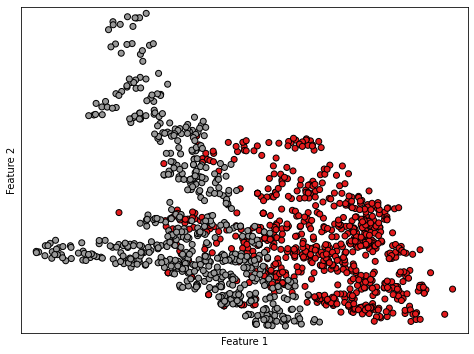

IndexError: index 2 is out of bounds for axis 1 with size 2

In [5]:
# only plots two features
plot_two_features_classification(df.iloc[:,0],df.iloc[:,2], df.iloc[:,4], 'figures/'+dataset_name+'.png')
plot_two_features_classification(dataset.X[:,0],dataset.X[:,1], dataset.y)


In [5]:
cnn1, cnn2 = create_cnn_and_fit_and_store_result(save_path, dataset, n, epochs)

--------create model-----------
param count is : 15
end of run - train loss array is: [0.5767393488200125, 0.3415067348387745, 0.3174854641133586, 0.3146480701767084, 0.3115209458843097, 0.30402491903528595, 0.2991710391308107, 0.2955619549456789, 0.29221072552454164, 0.28894125037157714, 0.28590196485399566, 0.2833791094494649, 0.2815250104224075, 0.2802230852246719, 0.2792648689663107]
end of run - val loss array is: [0.351633071377559, 0.34149365318267627, 0.33454365179314643, 0.3115183298292304, 0.2971683207236208, 0.2954638892440043, 0.2940797009803969, 0.29155730238347216, 0.2882855123434292, 0.2850560822513005, 0.28266298110392934, 0.28142775933735725, 0.28108900962442723, 0.28122189746591264, 0.2815232339410445]
end of run - val accuracy is: [0.8509090909090911, 0.8727272727272726, 0.8654545454545453, 0.8727272727272726, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.8763636363636363, 0.8763636363636363, 0.8763636363636363, 0.8799999999999999]
--------end fitting-----------

-----

In [4]:
create_qnn_and_fit_and_store_result(save_path, circuit_type="ZzFeatureMapRealAmplitudeCircuit", dataset=dataset, n=n, epochs=epochs)

create_qnn_and_fit_and_store_result(save_path, circuit_type="CombinedQnn", dataset=dataset, n=n, epochs=epochs)


NameError: name 'dataset' is not defined

In [8]:
create_hybridqnn_and_fit_and_store_result(save_path, "ZzFeatureMapRealAmplitudeCircuit", dataset, n, epochs)

create_hybridqnn_and_fit_and_store_result(save_path, "CombinedQnn", dataset, n, epochs)
    

--------create model-----------
param count is : 7
end of run - train loss array is: [0.6850767518061315, 0.6726863148490868, 0.65569718488322, 0.6096337115035978, 0.5777947510472653, 0.5584100892697857, 0.5457498076303505, 0.5367982261822665, 0.5308232919423749, 0.5262620111214912, 0.5225977425717557, 0.5197198734333821, 0.515584152478385, 0.5106588734188791, 0.5061733874354902]
end of run - val loss array is: [0.6651999741103709, 0.6558021195460357, 0.6217411899154396, 0.5822636841125165, 0.5566085901986602, 0.540122607934181, 0.5293717299804631, 0.522119803063522, 0.5173360294246335, 0.514987697832846, 0.5158334184625323, 0.5151807478036452, 0.5132199429615709, 0.508908453721331, 0.49937777576262865]
end of run - val accuracy is: [0.5854545454545454, 0.6036363636363636, 0.7272727272727273, 0.7745454545454545, 0.7599999999999998, 0.7599999999999999, 0.7672727272727273, 0.7745454545454548, 0.7636363636363638, 0.7636363636363638, 0.7600000000000002, 0.7672727272727273, 0.76000000000000

HybridClassificationNet(
  (qnn): QnnTorchConnector()
  (cnn): Linear(in_features=2, out_features=1, bias=True)
)

In [13]:
# import qiskit
# qiskit.__qiskit_version__